In [1]:
## Importing necessary libraries

import numpy as np
from scipy.fftpack import fft,fft2,ifft2,ifft,fftshift,ifftshift
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

import cv2
import os

og image shape:  (1280, 1920)


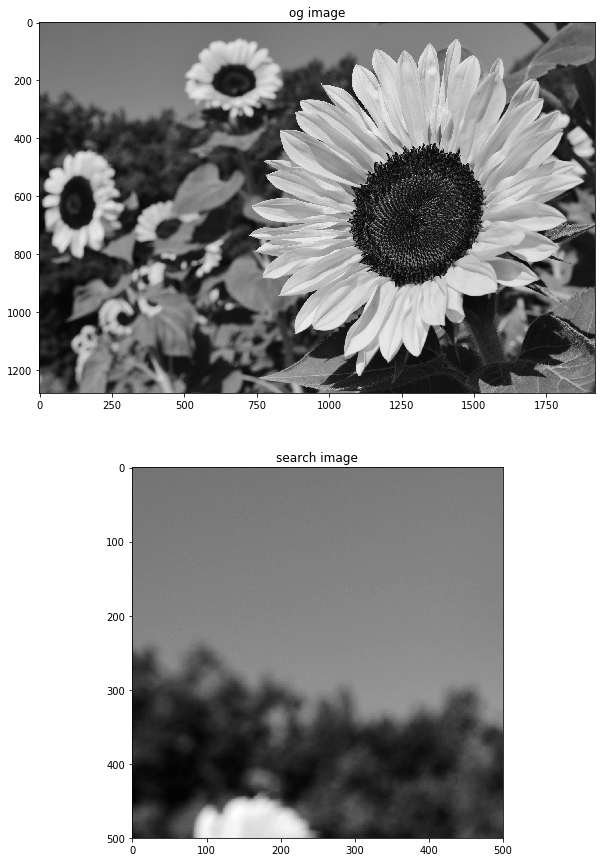

In [122]:
path = "./images/"
image_name = "sunflower.jpg"

## reading the image
img = cv2.imread(os.path.join(path,image_name),0)

img = img - img.mean()

search = img[:500,0:500]

print("og image shape: ",img.shape)

## visualizing the image

fig,ax = plt.subplots(2,1,figsize = (15,15))
ax[0].imshow(img,cmap = "gray")
ax[0].set_title("og image")

ax[1].imshow(search,cmap = "gray")
ax[1].set_title("search image")
plt.show()

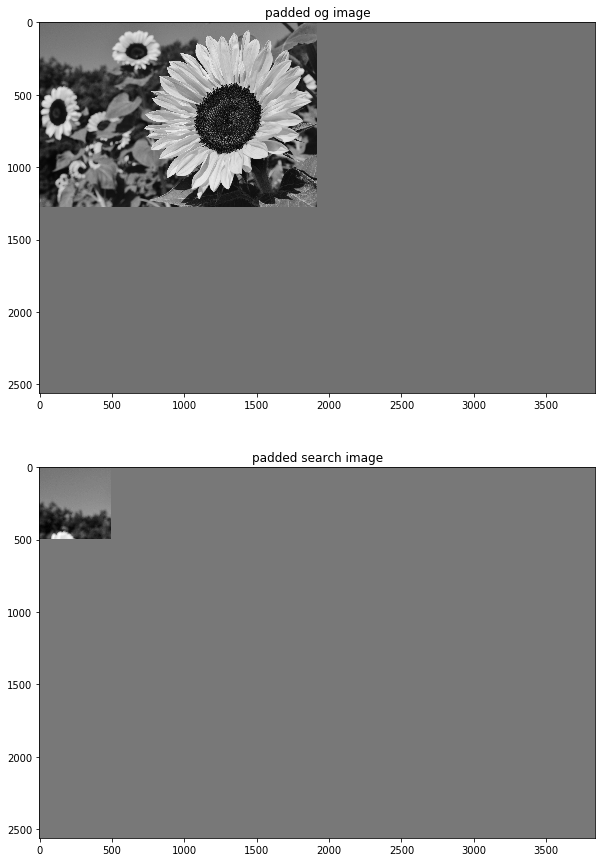

In [125]:
## padding the image before fourier transformation
img_pad = np.pad(img,((0,img.shape[0]),(0,img.shape[1])))
search_pad = np.zeros_like(img_pad)
search_pad[:500,:500] = search

fig,ax = plt.subplots(2,1,figsize = (15,15))
ax[0].imshow(img_pad,cmap = "gray")
ax[0].set_title("padded og image")
ax[1].imshow(search_pad,cmap = "gray")
ax[1].set_title("padded search image")
plt.show()

In [126]:
def plot_spectrum(im_fft):
    
    """
        function to plot the image spectrum
    """
    
    from matplotlib.colors import LogNorm

    plt.imshow(np.abs(im_fft), norm=LogNorm(vmin=5))
    plt.colorbar()

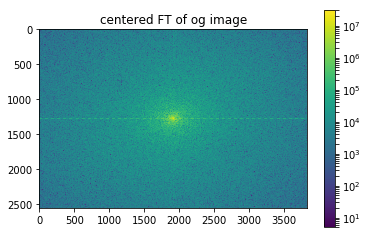

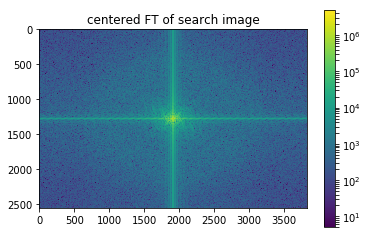

In [127]:
## Visualize images' spectrums

IMG = fft2(img_pad)
SEARCH = fft2(search_pad)


plt.figure()
plt.title("centered FT of og image")
plot_spectrum(fftshift(IMG))
plt.show()

plt.figure()
plt.title("centered FT of search image")
plot_spectrum(fftshift(SEARCH))
plt.show()

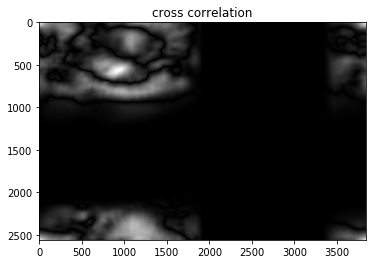

In [128]:
## Cross-correlate and visualize product

IS = IMG * np.conj(SEARCH)

iss = ifft2(IS)

plt.title("cross correlation")
plt.imshow(np.abs(iss),cmap = "gray")

In [129]:
np.where(iss == iss.max())

(array([3]), array([0]))